In [5]:
import pandas as pd
import tensorflow as tf
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('Reviews.csv').sample(frac=1)

rating = np.array(['Bad','Normal','Good']).repeat(2,axis=0)
y = df['Score'] -1
df.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator','HelpfulnessDenominator','Time','Score'],inplace=True)
y

5684     4
6984     1
2287     4
4489     4
365      4
        ..
12957    4
1153     0
13775    4
1501     4
3681     4
Name: Score, Length: 15000, dtype: int64

In [7]:
split = 0.8
limit = round(df.shape[0]*split)

x_train,y_train = df.iloc[:limit,1].to_numpy(),y.iloc[:limit].to_numpy()
x_test,y_test = df.iloc[limit:,1].to_numpy(),y.iloc[limit:].to_numpy()
x_test


array(['This is my first time trying Wabash Valley Farms Amish Country Baby White.<br /><br />Pros: It\'s okay with a nice mild nutty flavor. The hulls are more pronounced than with some other Amish "Baby White."<br /><br />Cons: It tends not to briskly pop up. In fact, we\'ve burned several pans because popping it is tricky. We found that the microwave often works better than pan popping. And as mentioned above, the hulls are much more noticeable than with other Amish "Baby White" brands.<br /><br />We purchased these 6 bags and we\'ll use them up but won\'t be ordering any more. Next time we\'ll drive the long distance to our nearest Amish store.',
       "My goldendoodle is picky and likes to change up his food once in a while. So I decided to try two other brands....what a mistake.<br /> Newman's own is really the best: my dog looks better, feels better, and the quality of food is very good. Do not do like I did and experiment around...my poor dogs stomach....stick with Newmans.",


In [8]:
max_vocab_length = 10000 
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=max_vocab_length,output_mode="int")
embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length,output_dim=128, embeddings_initializer="uniform") 
text_vectorizer.adapt(x_train)

In [9]:
inputs = tf.keras.layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = tf.keras.layers.Dense(5, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [10]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
375/375 [==============================] - 14s 27ms/step - loss: 1.0660 - accuracy: 0.6325
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.7514 - accuracy: 0.7193
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.4458 - accuracy: 0.8364
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2082 - accuracy: 0.9352
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0860 - accuracy: 0.9846
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0323 - accuracy: 0.9966
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0123 - accuracy: 0.9994
Epoch 8/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0063 - accuracy: 0.9995
Epoch 9/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0046 - accuracy: 0.9997
Epoch 10/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0029 - accuracy: 0.99

In [56]:
y_calc = model.predict(x_test)
model.evaluate(x_test,y_test)
y_calc

94/94 [==============================] - 0s 3ms/step - loss: 2.0009 - accuracy: 0.6800


array([[1.06393614e-07, 9.78866638e-07, 2.35419604e-03, 9.86140490e-01,
        1.15042133e-02],
       [8.44852440e-03, 4.38956049e-04, 9.39161051e-04, 1.04197729e-02,
        9.79753554e-01],
       [2.09842751e-11, 2.51003997e-13, 1.90588834e-09, 2.49356474e-03,
        9.97506440e-01],
       ...,
       [9.91080356e-08, 1.27423844e-11, 1.59371735e-11, 1.00614784e-06,
        9.99998927e-01],
       [4.68097960e-09, 1.18585031e-10, 1.07178437e-06, 4.41203043e-02,
        9.55878615e-01],
       [1.93577203e-11, 1.47846226e-13, 5.36939437e-10, 1.18669588e-03,
        9.98813272e-01]], dtype=float32)

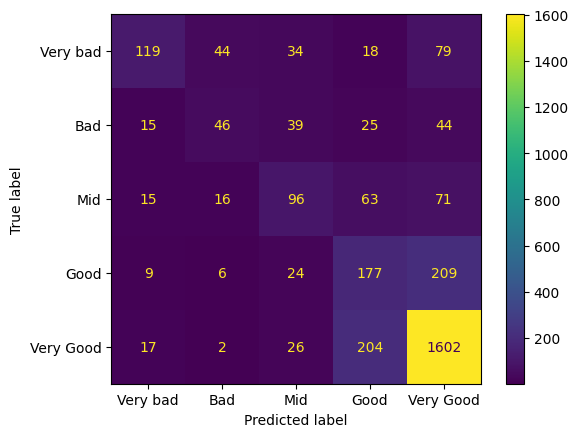

In [12]:
conf = sklearn.metrics.confusion_matrix(y_true=y_test,y_pred=np.argmax(y_calc,axis=1))
conf_matrix = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=conf,display_labels=['Very bad','Bad','Mid','Good','Very Good'])
conf_matrix.plot()

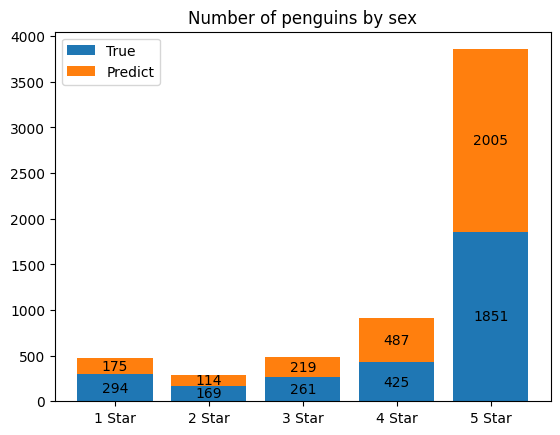

In [65]:
memo = {'True':np.array([len(y_test[y_test==i]) for i in np.unique(y_test)]),'Predict':np.array([len(y_calc[np.argmax(y_calc,axis=1)==i]) for i in np.unique(y_train)])}
bottom = np.zeros(5)
fig, ax = plt.subplots()

for label, data in memo.items():
    p = ax.bar([f"{i+1} Star" for i in range(5)], data,label=label,bottom=bottom)
    bottom += data

    ax.bar_label(p, label_type='center')

ax.set_title('Result Analysis')
ax.legend()

plt.show()

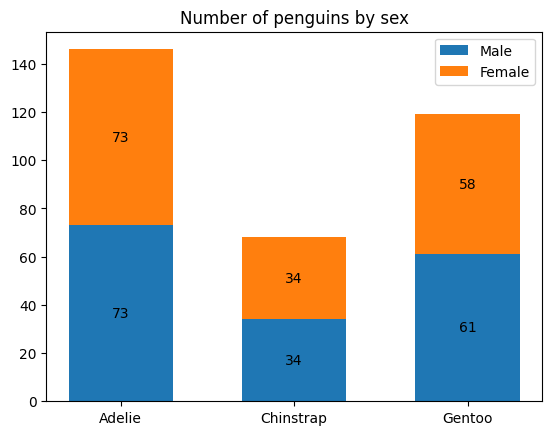

In [48]:
species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex,bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of penguins by sex')
ax.legend()

plt.show()